In [1]:
from __future__ import print_function

import pylab as pl

import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
mymean = 100

In [3]:
df = mymean

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


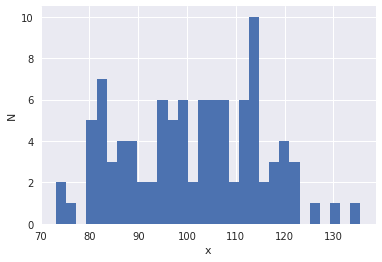

In [4]:
md = {}
md['chisq'] = np.random.chisquare(df, size=100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

In [5]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.30, standard deviation: 13.87


In [6]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


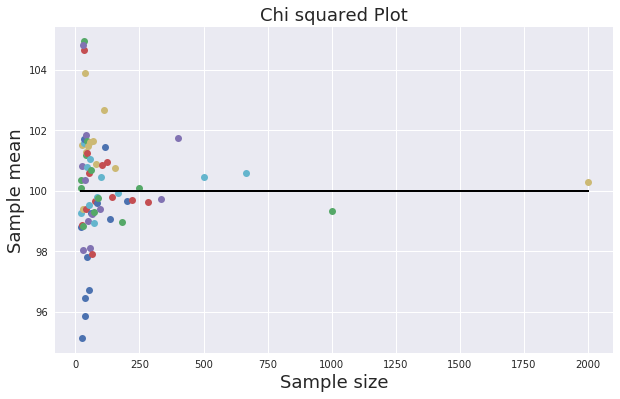

In [7]:
md['chisq'] = {} 
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared Plot', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: Plot of Sample Mean (Dependant Variable) against Sample Size N (Independant Variable) for Chi-Squared Distribution. As the sample size increases the sample mean tends to be closer to the expected value (100), thus abiding by the Law of large numbers. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


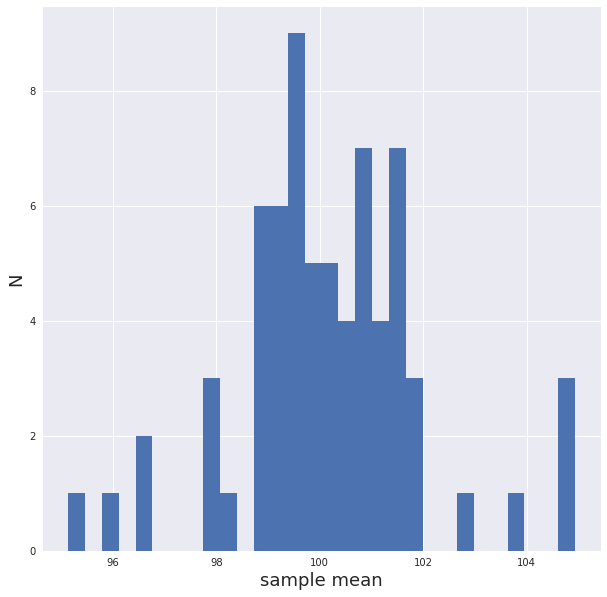

In [8]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: Histogram plotted for Chi-Squared Distribution for mean of all samples.

# Normal distribution


In [9]:
loc = mymean
scale = 1
md['norm'] = np.random.normal(loc, scale, size = 100)

In [10]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['norm'].mean(), md['norm'].std()))

Normal mean: 99.94, standard deviation: 1.13


In [11]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


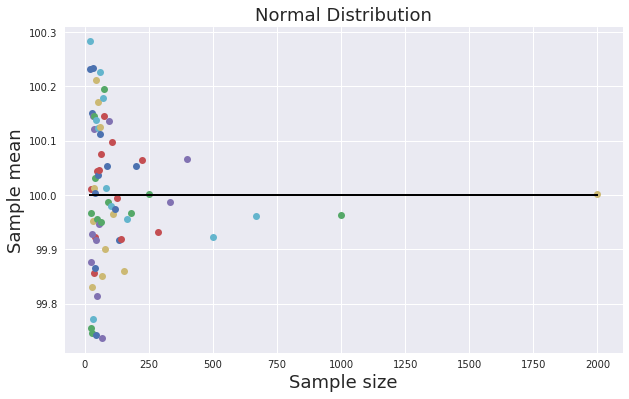

In [12]:
md['norm'] = {} 

for n in mysize:
    md['norm'][n] = np.random.normal(loc,scale, size = n)    

md['norm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('Sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('Sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal Distribution', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [loc, loc], 'k')

### Figure 4: Plot of Sample Mean (Dependant Variable) against Sample Size N (Independant Variable) for Normal Distribution. As the sample size increases the sample mean tends to be closer to the expected value (100), thus abiding by the Law of large numbers. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


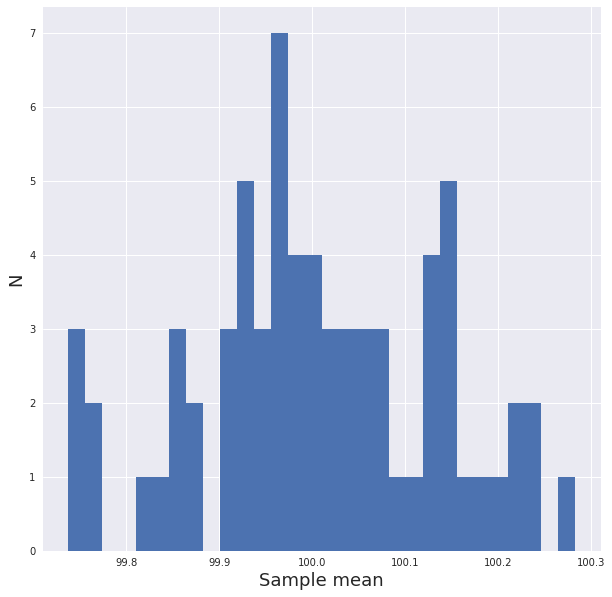

In [13]:
allmeans = list(md['norm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans ,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 5: Histogram plotted for Normal Distribution for mean of all samples.

# Poisson distribution

In [14]:
lam = mymean
md['pois'] = np.random.poisson(lam, size = 100)

In [15]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Normal mean: 99.51, standard deviation: 8.55


In [16]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


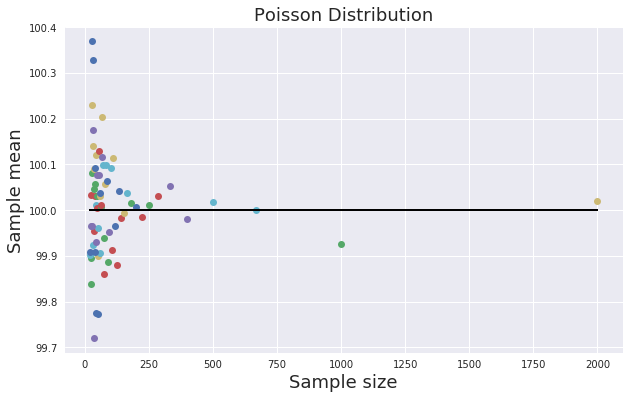

In [17]:
md['pois'] = {} 

for n in mysize:
    md['pois'][n] = np.random.normal(lam ,size = n)
    
md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('Sample size', fontsize=18)
        axpois_mu_n.set_ylabel('Sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

### Figure 6: Plot of Sample Mean (Dependant Variable) against Sample Size N (Independant Variable) for Poisson distribution. As the sample size increases the sample mean tends to be closer to the expected value (100), thus abiding by the Law of large numbers.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


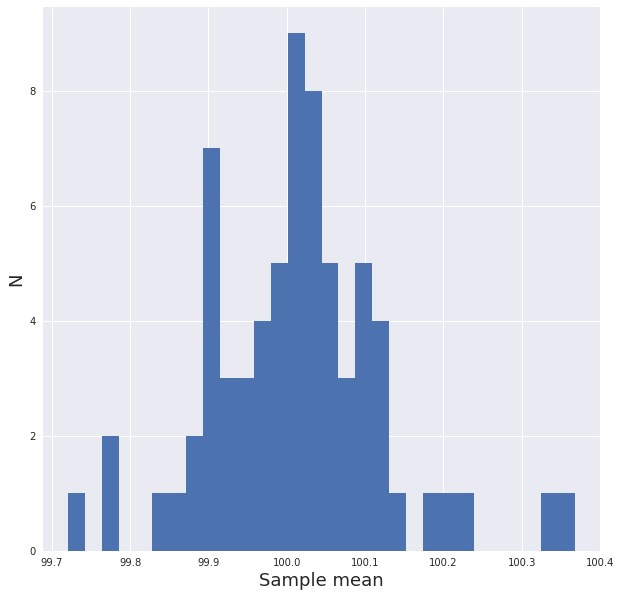

In [18]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans ,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 7: Histogram plotted for Poisson Distribution for mean of all samples.

# Binomial distribution

In [19]:
nbin = 200
p = 0.5
md['binomial'] = np.random.binomial(nbin, p, size = 100)

In [20]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Normal mean: 100.50, standard deviation: 7.10


In [21]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


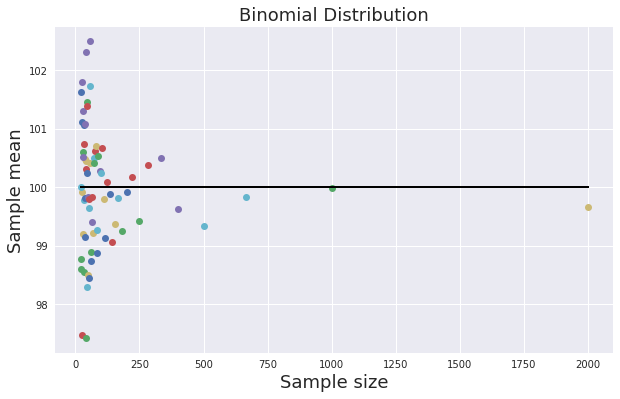

In [22]:
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = np.random.binomial(nbin, p,size = n)

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('Sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('Sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 8: Plot of Sample Mean (Dependant Variable) against Sample Size N (Independant Variable) for Binomial  distribution. As the sample size increases the sample mean tends to be closer to the expected value (100), thus abiding by the Law of large numbers.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


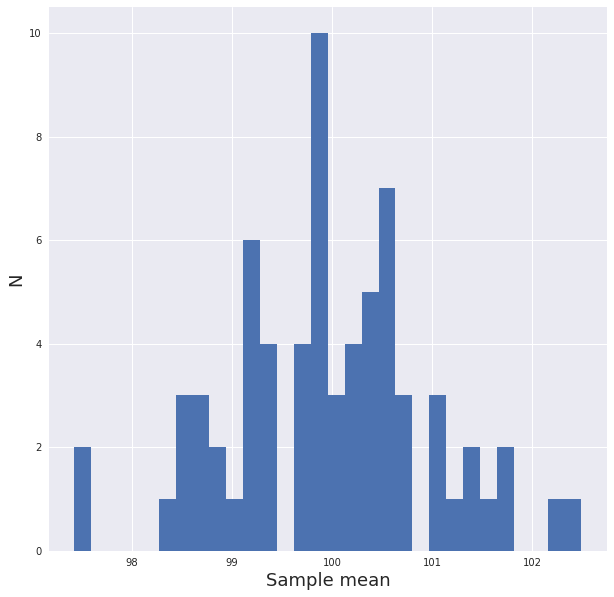

In [23]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans ,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 9: Histogram plotted for Binomial Distribution for mean of all samples.

# Laplace Distribution

In [24]:
loc = mymean
scale = 1
md['laplace'] = np.random.laplace(loc, scale, size = 100)

In [25]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['laplace'].mean(), md['laplace'].std()))

Normal mean: 99.79, standard deviation: 1.32


In [26]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


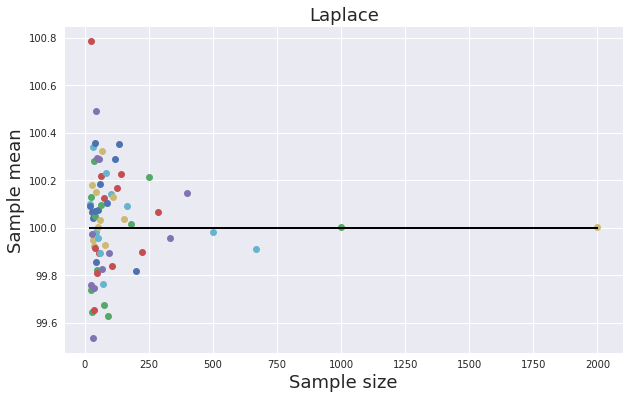

In [27]:
md['laplace'] = {} 

for n in mysize:
    md['laplace'][n] = np.random.laplace(loc, scale,size = n)   

md['laplace']['means'] = {}
axlaplace_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        #and plot it
        axlaplace_mu_n.plot(nn, md['laplace']['means'][nn], 'o')
        axlaplace_mu_n.set_xlabel('Sample size', fontsize=18)
        axlaplace_mu_n.set_ylabel('Sample mean', fontsize=18)
        axlaplace_mu_n.set_title('Laplace', fontsize=18)
        axlaplace_mu_n.plot([min(mysize), max(mysize)], [loc, loc], 'k')

### Figure 10: Plot of Sample Mean (Dependant Variable) against Sample Size N (Independant Variable) for Laplace distribution. As the sample size increases the sample mean tends to be closer to the expected value (100), thus abiding by the Law of large numbers.¶

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


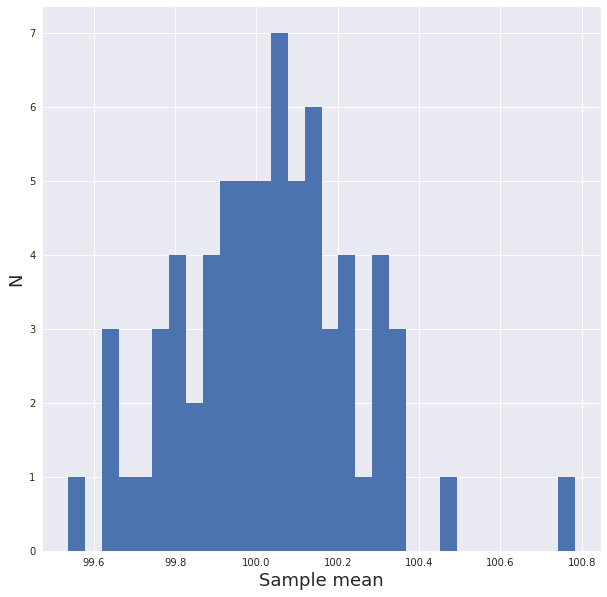

In [28]:
allmeans = list(md['laplace']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans ,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 11: Histogram plotted for Laplace Distribution for mean of all samples.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


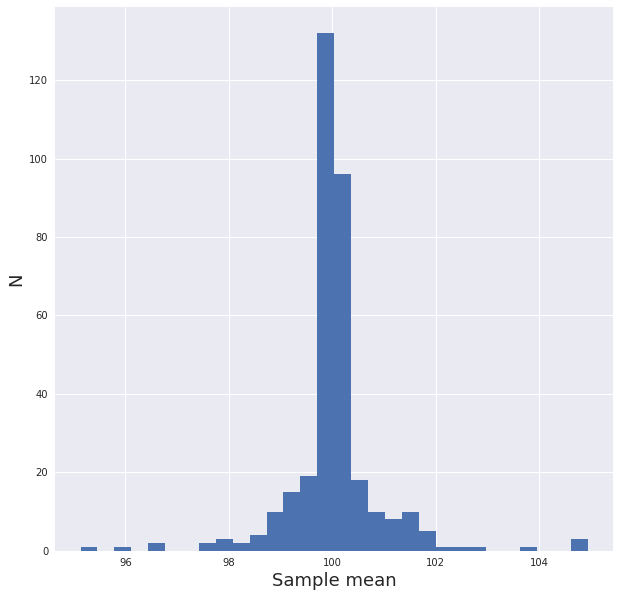

In [29]:
allmeans = []
for i in md:
    for j in md[i]['means']:
        allmeans.append(md[i]['means'][j])

pl.figure(figsize=(10, 10))
pl.hist(allmeans ,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 12: Histogram plotted for all above distributions together. The plot assumes shape close to a gaussian distribution, thus supporting the Central Limit Theorem.